## HMM Example
___________________________________________

Hidden Markov models (HMMs) are used to model dynamic processes. A basic assumption is that the observed data comes from a finite number of discrete states $\{X_1, \dots , X_k\}$. We model progression of the system through time as a chain of different states over time. For each time point $t$, we observe data $y^{(t)}$ coming from state $x^{(t)} \in \{X_1, \dots, X_k\}$. The data is drawn from an emission distribution $p(y \mid x^{(t)})$, however the state $x^{(t)}$ remains unobserved or latent.

![](hmm_im.png)

Real systems evolve over time. We simulate this in a Markov process by having a probability of changing from one state to another at each time step. To make the problem tractable for long processes, we assume that transitioning to a state depends only on the current state, and not on the past history of transitions. This assumption is called the Markov property. The probability of transitioning from state $X_i^{(t)} \rightarrow X_j^{(t+1)}$ is called the transition probability $\pi_{ij}$. These probabilities are often stored as a matrix so each entry $i,j$ contains $\pi_{ij}$. Note that transition probabilities depend on direction so this matrix is not symmetric. The diagonal entries represent the probability of staying in the same state.

Markov processes can be used to model many real world phenomena including speech, text, genomics, epidemics, finacial markets, and more. The simple example below explores data collected from the famous geyser Old Faithful from Yellowstone National Park. We are interested in eruption length (in minutes) for each eruption episode.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
Y = pd.read_table('faithful.txt', sep=',')
y = Y.eruptions

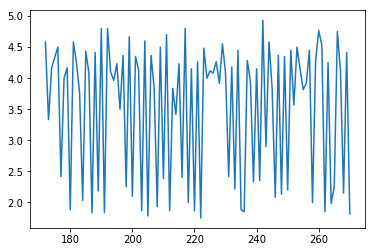

In [3]:
plt.plot(y[-100:-1])
pass

We can see that there is a cyclical pattern to the data. There are clearly at least two modes, long and short. A long eruption is often followed by a shorter eruption. There may be some evidence of a longer cyclical pattern where every 30 cycles, there is a period of sustained higher activity.

### Inference

To fit a HMM, we can use Bayesian inference techniques. In order to predict the eruption time of the next event, we need to find the most probable state that $(T+1)$ could be and what the parameters of the emission distributions are. We do this by placing prior probablities on these parameters and using the data to update our beliefs. In this we assume the following:

* $p(y \mid x_t = X_i) \sim N(\mu_i, \sigma^2_i)$
* $\mu_i \sim N(\mu_0, \tau)$
* $\sigma^2_i \sim \text{iGamma}(\nu, \nu)$
* $\pi_i \sim \text{Dir}(\alpha)$

This means that we assume the emission distributions are normal with mean and varience that comes from a normal and inverse gamma respectively. We can use Gibbs sampling along with the [forward-backward algorithm](https://en.wikipedia.org/wiki/Forward%E2%80%93backward_algorithm) to sample from the posterior. Below, we instantiate a HMM object with two states and perform sampling. 

In [4]:
from bayesHMM import HMM

In [13]:
hmm = HMM(n_states=3, n_samps=2000, n_burn=1000, seed=0)
hmm.fit(y)

100%|█████████████████████████████████████████████████████████| 3000/3000 [09:37<00:00,  5.20it/s]


The sampling steps iteratively updates parameters for mean and varience of the emission distributions and transition probabilities. Let's look at the distribution of means for the three states.

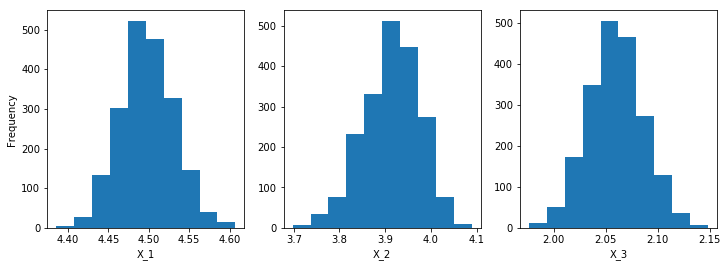

In [35]:
fig, ax = plt.subplots(1, 3, figsize=(12, 4))
labels = ['X_1', 'X_2', 'X_3']
for i in range(3):
    ax[i].hist(hmm.mean_samp[:,i])
    ax[i].set_xlabel(labels[i])
ax[0].set_ylabel('Frequency')
pass

We see three states, one with mean 4.5 minutes one with mean roughly at 2 minutes, and another at around 4 min. Each inference step also samples a new state for the next time point as well as a predicted value. We see below that the model predicts the most likely state is state $X_1$ which is the long duration state.

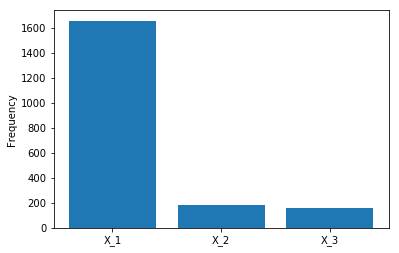

In [30]:
plt.bar(range(3), pd.Series(hmm.x_pred).value_counts())
plt.xticks(range(3), labels)
plt.ylabel('Frequency')
pass

We can also see the posterior predictive distribution for $y^{(T+1)}$. Most of the predicted values are longer than three minutes. This makes sense considering what we have seen from the patterns in the data.

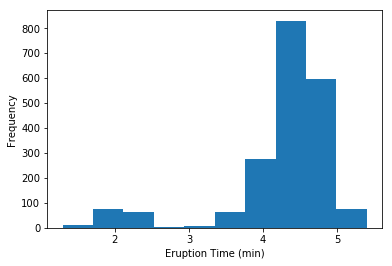

In [29]:
plt.hist(hmm.y_pred)
plt.xlabel('Eruption Time (min)')
plt.ylabel('Frequency')
pass

### References
_____________________

[Wikipedia article](https://en.wikipedia.org/wiki/Hidden_Markov_model) on hidden Markov models. 
[Notes](https://people.csail.mit.edu/rameshvs/content/hmms.pdf) on the forward-backward algorithm. 
MCMC update steps are detailed in this [paper](https://projecteuclid.org/download/pdf_1/euclid.ba/1340370402).